In [4]:
# Dependecies
import numpy as np
import pandas as pd
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import  MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from joblib import dump

In [5]:
# Create a method to display the report
def cv_report(model, X, y):

    cv_dict = cross_validate(model, X, y, scoring=["neg_mean_squared_error" , "accuracy", "precision", "recall"])

    #cv_mse = cv_dict["test_score"].mean()
    cv_accuracy = cv_dict["test_accuracy"].mean()
    cv_precision = cv_dict["test_precision"].mean()
    cv_recall = cv_dict["test_recall"].mean()

    #print(f"cv_mse: {cv_mse}")
    print(f"cv_accuracy: {cv_accuracy}")
    print(f"cv_precision: {cv_precision}")
    print(f"cv_recall: {cv_recall}")

In [6]:
df = pd.read_csv("fish_participant.csv")

In [7]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
1,Perch,110.0,20.0,22.0,23.5,5.5225,3.9950
2,Roach,160.0,20.5,22.5,25.3,7.0334,3.8203
3,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
4,Bream,700.0,30.4,33.0,38.3,14.8604,5.2854


In [8]:
df.shape

(111, 7)

In [9]:
## Dependent variable is 'Weight'. Independent variables are 'species', different lengths, 'height' and 'width'.
# Changing the Column Names:
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
1,Perch,110.0,20.0,22.0,23.5,5.5225,3.9950
2,Roach,160.0,20.5,22.5,25.3,7.0334,3.8203
3,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
4,Bream,700.0,30.4,33.0,38.3,14.8604,5.2854


## EDA

In [10]:
# Check for null values
df.isnull().values.sum()

0

In [11]:
# Data clean up and pre-processing
print(str('Is there any NaN value in the dataset: '), df.isnull().values.any())

Is there any NaN value in the dataset:  False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    111 non-null    object 
 1   Weight     111 non-null    float64
 2   LengthVer  111 non-null    float64
 3   LengthDia  111 non-null    float64
 4   LengthCro  111 non-null    float64
 5   Height     111 non-null    float64
 6   Width      111 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.7+ KB


In [13]:
# Count of the species
species_count = df['Species'].value_counts()
species_count = pd.DataFrame(species_count)
species_count.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,39,24,14,12,10,8,4


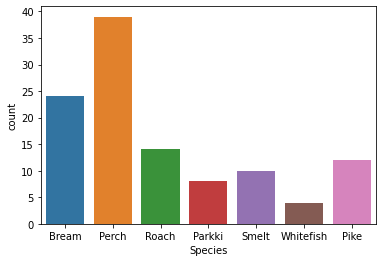

In [14]:
# Graphical representation
sns.countplot(data = df, x = 'Species')

## Obervations:
There are 7 species of fishes in our data and Perch have maximum count

## Model Selection

In [15]:
# Target Variable
y = df['Weight'].values
# Independant Variables. Not including species and weight
X = df.columns
#X = df.iloc[:,2:7]
X = df [['LengthVer', 'LengthDia', 'LengthCro', 'Height',
       'Width']].values


In [16]:
df.shape

(111, 7)

## Null model

In [17]:
dr = DummyRegressor()

In [18]:
mse_dr = cross_validate(dr,X,y, scoring="neg_mean_squared_error")["test_score"].mean()
print("MSE for Dummy Regressor is: ", mse_dr)

MSE for Dummy Regressor is:  -114060.48235442504


## Linear Regression

In [19]:
lr = LinearRegression()

In [20]:
cross_validate(lr,X,y, scoring="neg_mean_squared_error")

{'fit_time': array([0.00099754, 0.00099659, 0.        , 0.00099683, 0.        ]),
 'score_time': array([0.0009973 , 0.        , 0.0009973 , 0.        , 0.00099683]),
 'test_score': array([-24259.98574403, -10437.91417821, -15205.53725906, -13609.49349964,
        -15766.97633011])}

In [21]:
mse_lr = cross_validate(lr,X,y, scoring="neg_mean_squared_error")["test_score"].mean()

In [22]:
print("MSE for Linear Regression Model is: ",  mse_lr)

MSE for Linear Regression Model is:  -15855.981402209043


## PCA

In [23]:
pca_regressor = make_pipeline(
PCA(3),
LinearRegression()
)

In [24]:
pca_mse = cross_validate(pca_regressor,X,y, scoring="neg_mean_squared_error")["test_score"].mean()

In [25]:
print("MSE for PCS is: ",  pca_mse)

MSE for PCS is:  -15921.730212672031


## LassoCV

In [26]:
lasso_scaled = make_pipeline(
StandardScaler(),
LassoCV()
)

In [27]:
mse_lasso = cross_validate(lasso_scaled,X,y, scoring="neg_mean_squared_error")["test_score"].mean()

C:\Users\look4\.virtualenvs\solution-k_UDe7ND\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3997.5087852701545, tolerance: 955.6051498977272
  positive)
C:\Users\look4\.virtualenvs\solution-k_UDe7ND\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3404.649963375181, tolerance: 993.020683550562
  positive)
C:\Users\look4\.virtualenvs\solution-k_UDe7ND\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3992.796940940898, tolerance: 1001.7442896404494
  positive)
C:\Users\look4\.virtualenvs\solution-k_UDe7ND\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objec

In [28]:
print("MSE for PCS is: ", mse_lasso)

MSE for PCS is:  -16007.066690301557


## Decision Tree

In [29]:
dt = DecisionTreeRegressor()

In [30]:
mse_dt =  cross_validate(dt,X,y, scoring="neg_mean_squared_error")["test_score"].mean()

In [31]:
print("MSE for PCS is: ", mse_dt)

MSE for PCS is:  -8929.112205533596


## Random Forest

In [32]:
rf = RandomForestRegressor()

In [33]:
mse_rf = cross_validate(rf,X,y, scoring="neg_mean_squared_error")["test_score"].mean()

In [34]:
print("MSE for PCS is: ", mse_rf)

MSE for PCS is:  -7194.843864127666


## Multi Layer Perception

In [35]:
mlpr  = MLPRegressor()

In [36]:
mse_mlpr = cross_validate(mlpr,X,y, scoring="neg_mean_squared_error")["test_score"].mean()

C:\Users\look4\.virtualenvs\solution-k_UDe7ND\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\look4\.virtualenvs\solution-k_UDe7ND\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\look4\.virtualenvs\solution-k_UDe7ND\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\look4\.virtualenvs\solution-k_UDe7ND\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterati

In [37]:
print("MSE for PCS is: ", mse_mlpr)

MSE for PCS is:  -66021.52153727273


## Multi Layer Perception Scaled

In [38]:
mlpr_scaled = make_pipeline(
StandardScaler(),
MLPRegressor()
)

In [39]:
mse_mlpr_scaled = cross_validate(mlpr_scaled,X,y, scoring="neg_mean_squared_error")["test_score"].mean()

C:\Users\look4\.virtualenvs\solution-k_UDe7ND\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\look4\.virtualenvs\solution-k_UDe7ND\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\look4\.virtualenvs\solution-k_UDe7ND\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\look4\.virtualenvs\solution-k_UDe7ND\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterati

In [40]:
print("MSE for PCS is: ", mse_mlpr_scaled)

MSE for PCS is:  -255233.0134922929


## Train the Final Model

In [41]:
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
dump(rf, "clf.joblib")

['clf.joblib']

In [46]:
#X

In [44]:
rf.predict(X)

array([ 416.55 ,  122.65 ,  160.71 ,   56.657,  669.35 ,   44.717,
        626.8  ,  260.58 ,    7.199,  254.91 ,  945.15 ,  572.22 ,
        274.32 , 1410.57 ,  487.2  ,  187.38 ,  695.3  ,  463.52 ,
          9.929,  686.26 ,   86.52 ,  662.99 ,   51.764,  701.85 ,
       1066.95 ,   97.78 ,  562.61 ,   71.33 ,    8.027,  117.64 ,
        319.8  ,   92.72 ,  138.34 ,    9.333,  115.22 ,  539.74 ,
        849.51 ,  722.48 ,  145.27 ,  384.47 ,  261.25 , 1023.2  ,
        593.95 ,  969.67 ,  809.04 ,  446.89 ,  484.7  ,  683.06 ,
        457.97 ,   23.883,    9.879,  255.23 ,  321.28 ,  149.98 ,
        865.9  ,  294.67 ,  200.97 ,  235.27 ,  523.53 ,  506.51 ,
        923.79 ,  170.31 ,    9.003, 1069.4  ,  832.4  ,  149.5  ,
        699.05 ,  455.   ,  390.04 ,  146.19 ,  992.85 ,   41.072,
        120.4  ,  435.41 ,  258.33 ,  140.13 ,  271.32 ,  693.7  ,
          9.79 ,  122.37 ,  861.7  ,  288.58 ,  450.06 ,  146.35 ,
       1223.2  , 1002.9  ,  700.86 ,  327.04 ,  160.68 ,  183.

In [45]:
df [['LengthVer', 'LengthDia', 'LengthCro', 'Height',
       'Width']]

,LengthVer,LengthDia,LengthCro,Height,Width
0,26.5,29.0,34.0,12.4440,5.1340
1,20.0,22.0,23.5,5.5225,3.9950
2,20.5,22.5,25.3,7.0334,3.8203
3,14.3,15.5,17.4,6.5772,2.3142
4,30.4,33.0,38.3,14.8604,5.2854
...,...,...,...,...,...
106,23.5,25.6,27.0,6.5610,4.2390
107,19.0,20.7,23.2,8.5376,3.2944
108,19.1,20.8,23.1,6.1677,3.3957
109,34.0,36.5,39.0,10.8810,6.8640
